# Prediction using unsupervised Machine Learning
## In this we will be using IRIS dataset and then finding the optimal number of clusters and then visually represent it

## Importing the library and data

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#importing the data and printing some data to check it
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Now lets apply K-means clustering to cluster the data
### For using K-means we have to decide the number of clusters i.e. value of k, which should be optimal. For such cases we have to use the concept of WCSS(Within Cluster Sum of Squares). In this the sum of the squares of distances of the data points in each and every cluster from its centroid.
#### The main idea is to minimize the distance between the data points and the centroid of the clusters. The process is iterated until we reach a minimum value for the sum of distances.

#### But in order to get the optimal values we use the concept ELBOW METHOD. In this for some value of k(number of clusters) we find the WCSS and then we plot it.
#### The sharp point of bend or a point( looking like an elbow joint ) of the plot like an arm, will be considered as the best/optimal value of K

##### Now lets try this......

C:\Users\SHARATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


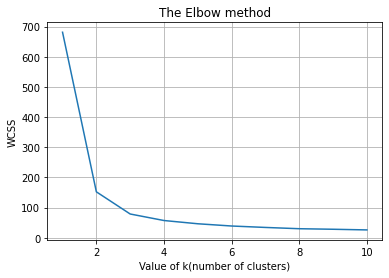

In [3]:
#findiing the optimum number of clusters for k-means clusterig
x = data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=200,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
#plotting the results in form of line
#Used to observe the elbow
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Value of k(number of clusters)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### From the above graph we can clearly see that for the value of k = 3, the value fo WCSS doesn't decrease significantly with every iteration

In [10]:
# Lets fit the KMeans algorithm on the data. 
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

### Lets visualize the KMeans and then visualize the Clusters. 


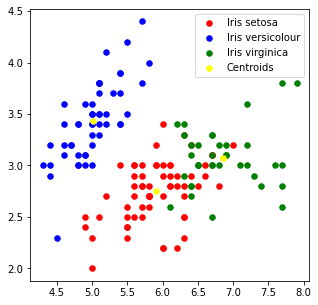

In [21]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(5,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 30, c = 'red', label = 'Iris setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 30, c = 'blue', label = 'Iris versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 30, c = 'green', label = 'Iris virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 30, c = 'yellow', label = 'Centroids')

plt.legend()